In [2]:
import pandas as pd 
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date


from statsmodels.tsa.stattools import adfuller


In [9]:
ticker = ['TSLA']
start_date = "2022-01-01"
end_date = date.today()

data = yf.download(ticker, start_date,  end_date)['Close']
data


[*********************100%***********************]  1 of 1 completed


Date
2022-01-03    399.926666
2022-01-04    383.196655
2022-01-05    362.706665
2022-01-06    354.899994
2022-01-07    342.320007
                 ...    
2023-05-30    201.160004
2023-05-31    203.929993
2023-06-01    207.520004
2023-06-02    213.970001
2023-06-05    217.610001
Name: Close, Length: 357, dtype: float64

In [ ]:
data['pct_change'] = data['Close'].pct_change()*100

In [ ]:
df = data[['Close','pct_change']]
df.sample(10)

,Close,pct_change
Date,,
2023-04-05,185.520004,-3.666008
2022-03-02,293.296661,1.795530
2022-01-25,306.133331,-1.247312
2023-03-27,191.809998,0.735252
2022-02-22,273.843323,-4.136624
2022-07-06,231.733337,-0.572080
2022-05-26,235.910004,7.427139
2022-12-15,157.669998,0.554844
2023-04-25,160.669998,-1.156570


In [10]:
class Indicator:

    def __init__ (self, data, start_date, end_date, ticker):
        self.ticker = ticker
        self.data = yf.download([self.ticker], start_date, end_date)['Close']
        self.start_date =  self.data.index[0].strftime("%Y-%m-%d")
        self.end_date = self.data.index[-1].strftime("%Y-%m-%d")
        self.cost = [0]
        self.benefit = []
        self.have = 0
        self.budget = 1000
        self.total = []

    def SMA(self, window = 50):

        rolling_mean = self.data.rolling(window).mean()
        plt.figure(figsize = (10,6))
        return rolling_mean

    def EMA(self, k = 2):

        alpha = 2/(k+1)
        S = np.repeat(0, len(self.data))
        S = pd.Series(S)
        for i in range (1, len(self.data)):
            S[i] = alpha*self.data[i] + (1-alpha)*S[i-1]
        S.index = pd.to_datetime(self.data.index)
        return S

    def smooth_plot(self, smoothed, name = "", k=2):

        plt.plot(self.data, label = f'Close Prices of {self.ticker}')
        plt.plot(S, label = f'{type} with lookback {k}')
        plt.plot(self.data - S, label = 'Closing prices - EMA')
        plt.title(f'Stock Prices vs. {type}')
        plt.xlabel('Date')
        plt.legend()
        plt.show()


    def entropy(self, x):
        from scipy.stats import entropy

        n = len(x)

        if n>=10000:
          nbins = 20
        elif n>=1000:
          nbins = 10
        elif n>=100:
          nbins = 5
        else:
          nbins = 3
        
        counts, bin_edges = np.histogram(x, bins=nbins)

        probabilities = counts / np.sum(counts)

        entropy_value = entropy(probabilities, base=2)

        return entropy_value


    

         

In [ ]:
start_date = "2022-01-01"
end_date = "2022-07-01"
indicator = Indicator(data,start_date, end_date,'DNN')

S = indicator.EMA(10)
indicator.smooth_plot(S,'EMA',10)

indicator.entropy([1,2,3])


[*********************100%***********************]  1 of 1 completed


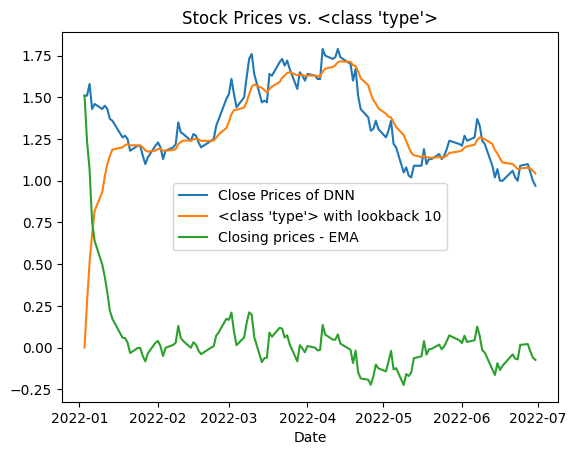

1.584962500721156

,Close
Date,
2023-01-03 00:00:00,0.10436
2023-01-04 00:00:00,0.122218
2023-01-05 00:00:00,0.113329
2023-01-06 00:00:00,0.198851
2023-01-09 00:00:00,0.262364
...,...
2023-05-26 00:00:00,0.058269
2023-05-30 00:00:00,0.029559
2023-05-31 00:00:00,0.076961


In [ ]:
data.pct_change().fillna(0).mean()

Open         -0.000857
High         -0.001212
Low          -0.001062
Close        -0.001020
Adj Close    -0.001020
Volume        0.027138
pct_change         inf
dtype: float64

[971.039981842041, 1019.6999716758728, 970.2000093460083, 989.4000291824341, 1030.1999807357788, 1047.2000226974487, 990.3600393533707, 979.6999907493591, 1039.9999618530273, 980.5599727630615, 971.3599643707275, 989.3999814987183, 1009.7999811172485, 1009.3999719619751, 1049.3999433517456, 1028.1999444961548, 1047.600041627884]
20 : 131.00999283790588


131.00999283790588